<a href="https://colab.research.google.com/github/kimhwijin/HandsOnMachineLearing/blob/main/ModelTraining_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

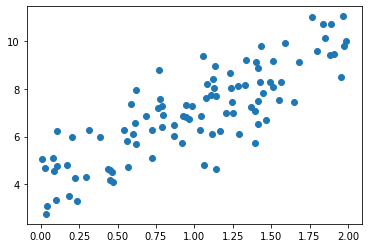

In [1]:
#Model Training

#정규방정식 증명
#theta_hat = (X.T X)^-1 X.T Y 
import numpy as np
import matplotlib.pyplot as plt
X = 2 * np.random.rand(100 ,1)
y = 4 + 3 * X + np.random.randn(100, 1) # 기대 파라미터 : 4, 3
plt.plot(X, y, 'o')

In [2]:
#정규방정식을 통한 theta 계산
X_b = np.c_[np.ones((100, 1)), X] #샘플에 x0 = 1 을 추가
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(theta_best)
#random.randn 가우시안 noise 때문에 정확한 예측은 안됌

[[4.09605504]
 [2.9171444 ]]


[[4.09605504]
 [9.93034384]]


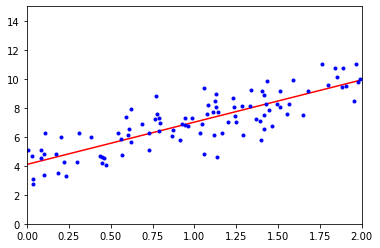

In [3]:
X_new = np.array([[0], [2]])
X_new_b =  np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
print(y_predict)
plt.plot(X_new, y_predict, 'r-')
plt.plot(X,y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [4]:
#사이킷런의 선형 회귀
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
print(lin_reg.intercept_, lin_reg.coef_)
print(lin_reg.predict(X_new))

#LinearRegression -> 최소 제곱을 기반으로함
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
print(theta_best_svd)

#theta_hat = X^+ y 를 계산한다. X^+ 는 유사역행렬(무어-펜로즈 역행렬)
print(np.linalg.pinv(X_b).dot(y))

[4.09605504] [[2.9171444]]
[[4.09605504]
 [9.93034384]]
[[4.09605504]
 [2.9171444 ]]
[[4.09605504]
 [2.9171444 ]]


[[4.09605504]
 [2.9171444 ]]


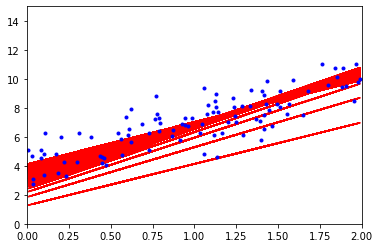

In [5]:
#경사 하강법
eta = 0.1 #0.02 #0.5
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta)- y)
    theta = theta - eta * gradients
    plt.plot(X, X_b.dot(theta), 'r-')
print(theta)

plt.plot(X,y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [6]:
#SGD 학습 스케쥴 적용하기
n_epochs = 50
t0, t1 = 5, 50 #학습 스케쥴

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1) #무작위 초기화

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

print(theta)

[[4.12682105]
 [2.94903565]]


In [7]:
#sklearn의 SGDRegressor 사용해보기
#SGDRegressor eta(t) = eta0 / t ** power_t  (default t = 0.01, power_t = 0.25)
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())
print(sgd_reg.intercept_, sgd_reg.coef_)

[4.08620222] [2.91097167]


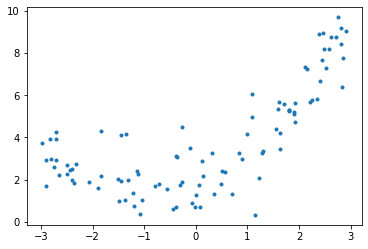

In [8]:
#다항 회귀
m = 100
X = 6 * np.random.rand(m, 1) - 3 #-3 ~ 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)
plt.plot(X, y, '.')

In [9]:
#훈련세트(X) 의 각 특성을 제곱하여 새로운 특성으로 추가한다.
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
print(X[0])
print(X_poly[0])
#Polynomial Features 같은경우 팩토리얼의 수준으로 늘어난다. degree = d, features = n : n개의 특성을 0 ~ d 개를 뽑을 수 있는 중복조합의 수

[2.91579467]
[2.91579467 8.50185859]


[2.00312338] [[0.93743024 0.495704  ]]


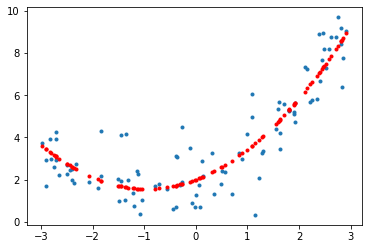

In [10]:
#데이터셋을 변화시켜 선형 회귀로 비선형 데이터셋을 훈련시킨다.
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
print(lin_reg.intercept_, lin_reg.coef_)
plt.plot(X, y, '.')
plt.plot(X, lin_reg.predict(X_poly), 'r.')

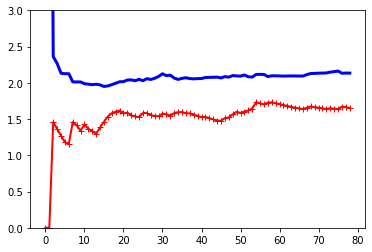

In [11]:
#학습 곡선
#훈련 세트, 검증 세트를 점차 추가하면서 과소적합, 과대적합 부분을 확인한다.

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

#1차 방정식 : 과소적합 그래프
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="훈련세트")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="검증세트")
    plt.ylim(0, 3)
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

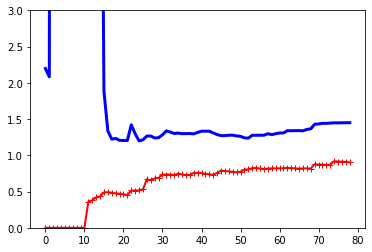

In [12]:
#10차 방정식
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
                                  ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                                  ("lin_reg", LinearRegression()),
])
plot_learning_curves(polynomial_regression, X, y)

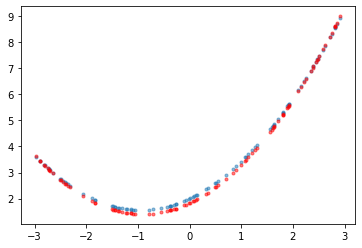

In [16]:
#릿지 회귀, 규제적용
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X_poly, y)
plt.plot(X,ridge_reg.predict(X_poly), '.' ,alpha=0.5)
sgd_reg = SGDRegressor(penalty="l2") #penalty l2 는 비용함수에 가중치 벡터의 l2 norm 제곱을 2로 나눈 규제항을 추가한다. ridge와 같다.
sgd_reg.fit(X_poly, y.ravel())
plt.plot(X, sgd_reg.predict(X_poly), 'r.',alpha=0.5)

In [17]:
#엘라스틱 넷
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
print(elastic_net.predict([[1.5]]))

[5.05393228]


In [25]:
#조기 종료
from copy import deepcopy
from sklearn.preprocessing import StandardScaler

X_train, X_val, y_train, y_val = train_test_split(X, y.reshape((len(y),)), test_size=0.2)

poly_scaler = Pipeline([
                        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
                        ("std_scaler", StandardScaler())
])
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

#Warm start true : fit 메서드 호출시 이전 모델 파라미터에서 시작
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True, penalty=None, learning_rate="constant", eta0=0.0005)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = deepcopy(sgd_reg)

print(best_epoch)
print(best_model)

927
SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.0005, fit_intercept=True, l1_ratio=0.15,
             learning_rate='constant', loss='squared_loss', max_iter=1,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=-inf, validation_fraction=0.1, verbose=0,
             warm_start=True)


In [31]:
#logistic regressor
from sklearn import datasets
iris = datasets.load_iris()
X = iris["data"][:, 3:]

y = (iris["target"] == 2).astype(np.int)

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

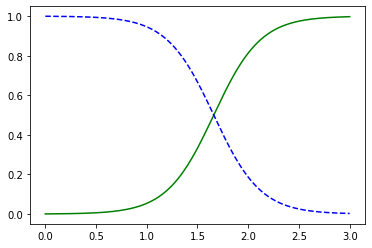

In [32]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-")
plt.plot(X_new, y_proba[:, 0], "b--")